In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv(r"C:\Users\DeLL\Documents\Python Files\Stats and ML by Garvit\ML\NB\Data+Code\har_train.csv")
df_test = pd.read_csv(r"C:\Users\DeLL\Documents\Python Files\Stats and ML by Garvit\ML\NB\Data+Code\har_validate.csv")

In [3]:
df_train.shape

(13737, 53)

In [4]:
df_test.shape

(5885, 53)

In [6]:
df_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
roll_belt,13737.0,64.503131,62.768030,-28.90,1.10,114.00,123.00,162.00
pitch_belt,13737.0,0.191794,22.363296,-54.90,1.67,5.26,14.80,60.30
yaw_belt,13737.0,-10.941653,95.374331,-180.00,-88.30,-12.70,13.60,179.00
total_accel_belt,13737.0,11.317973,7.744534,0.00,3.00,17.00,18.00,28.00
gyros_belt_x,13737.0,-0.004831,0.206729,-1.04,-0.03,0.03,0.11,2.22


In [7]:
df_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
roll_belt,5885.0,64.183263,62.713506,-28.60,1.08,113.00,123.00,162.00
pitch_belt,5885.0,0.570192,22.322734,-55.80,1.93,5.36,15.30,60.10
yaw_belt,5885.0,-11.819918,94.776716,-179.00,-88.30,-14.30,7.39,179.00
total_accel_belt,5885.0,11.300085,7.737757,1.00,3.00,17.00,18.00,29.00
gyros_belt_x,5885.0,-0.007370,0.208729,-0.98,-0.03,0.03,0.11,2.02


In [8]:
df_train.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,...,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,...,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,...,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.0,-0.03,-22,3,...,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.0,-0.02,-21,4,...,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478


In [9]:
pd.set_option('display.max_columns',55)

In [10]:
df_train.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,22,-3,599,-313,-128.0,22.5,-161.0,34,0.00,0.00,-0.02,-288,109,-123,-368,337,516,13.052175,-70.494004,-84.873939,37,0.0,-0.02,0.00,-234,47,-271,-559,293,-65,28.4,-63.9,-153.0,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,22,-7,608,-311,-128.0,22.5,-161.0,34,0.02,-0.02,-0.02,-290,110,-125,-369,337,513,13.130740,-70.637505,-84.710647,37,0.0,-0.02,0.00,-233,47,-269,-555,296,-64,28.3,-63.9,-153.0,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,23,-2,600,-305,-128.0,22.5,-161.0,34,0.02,-0.02,-0.02,-289,110,-126,-368,344,513,12.850750,-70.278120,-85.140781,37,0.0,-0.02,0.00,-232,46,-270,-561,298,-63,28.3,-63.9,-152.0,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.0,-0.03,-22,3,21,-6,604,-310,-128.0,22.1,-161.0,34,0.02,-0.03,0.02,-289,111,-123,-372,344,512,13.431200,-70.393795,-84.873626,37,0.0,-0.02,-0.02,-232,48,-269,-552,303,-60,28.1,-63.9,-152.0,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.0,-0.02,-21,4,21,0,603,-312,-128.0,22.0,-161.0,34,0.02,-0.03,0.00,-289,111,-122,-369,342,513,13.382459,-70.817588,-84.465003,37,0.0,-0.02,0.00,-234,48,-269,-558,294,-66,27.9,-63.9,-152.0,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478


In [12]:
pd.unique(df_train['classe'])

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [13]:
df_train['classe'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [14]:
x_train = df_train.drop('classe',axis=1)
x_test = df_test.drop('classe',axis=1)
y_train = df_train['classe']
y_test = df_test['classe']

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
gb = GaussianNB()

In [17]:
gb.fit(x_train,y_train)

GaussianNB()

In [18]:
pred = gb.predict(x_test)

In [19]:
pred

array(['A', 'A', 'A', ..., 'E', 'E', 'E'], dtype='<U1')

In [21]:
pred[:150]

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D',
       'E', 'E', 'E', 'E', 'D', 'C', 'C', 'C', 'D', 'C', 'D', 'D', 'D',
       'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D'], dtype='<U1')

In [30]:
from sklearn.metrics import confusion_matrix,roc_curve,auc,classification_report

In [24]:
mat = confusion_matrix(y_test,pred)
mat

array([[1070,   95,  262,  212,   35],
       [ 127,  685,  145,   76,  106],
       [ 223,  106,  512,  136,   49],
       [ 102,   35,  271,  441,  115],
       [  51,  239,   95,  143,  554]], dtype=int64)

<Axes: >

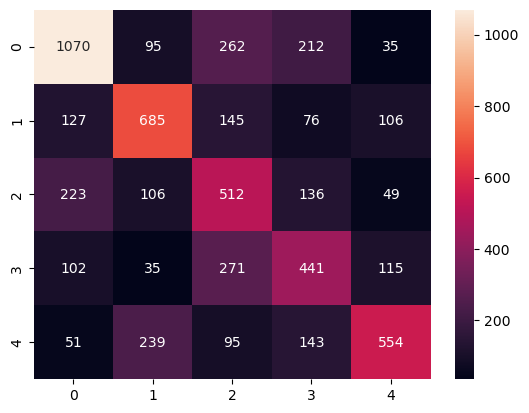

In [25]:
sns.heatmap(mat,annot=True, fmt='d')

In [38]:
y_probs = gb.predict_proba(x_test)

In [45]:
y_probs = y_probs[:,1]

In [42]:
x_test.shape

(5885, 52)

In [35]:
y_test.values.shape

(5885,)

In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           A       0.68      0.64      0.66      1674
           B       0.59      0.60      0.60      1139
           C       0.40      0.50      0.44      1026
           D       0.44      0.46      0.45       964
           E       0.64      0.51      0.57      1082

    accuracy                           0.55      5885
   macro avg       0.55      0.54      0.54      5885
weighted avg       0.57      0.55      0.56      5885

